In [1]:
import matplotlib.pyplot as plt
import  numpy as np
import  pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import seaborn as sns
sns.set_theme(style="ticks")

### *0.1* LOAD DATA 

In [3]:
df_data= pd.read_csv(os.path.join('..','data', 'cs-training.csv'))
df_data.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## **DATA INFORMATION**

### 0.1 GENERAL INFORMATIONS

In [5]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### 0.2 FEATURE ENGINEERING

In [6]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)


In [7]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

### 0.3 SPLITTING THE DATA

In [8]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
X_train, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96215, 9) (24054, 9) (96215,) (24054,)


In [40]:
X_train.columns

Index(['balance_divided_creditlimit', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents'],
      dtype='object')

In [9]:
###############################################################################
lista= ['balance_divided_creditlimit', 'DebtRatio', 'MonthlyIncome']
X_train['NumberRealEstateLoansOrLines'].value_counts().sort_index()



NumberRealEstateLoansOrLines
0     34657
1     33554
2     21320
3      4258
4      1432
5       458
6       226
7       110
8        58
9        48
10       25
11       16
12       13
13       13
14        5
15        4
16        3
17        2
18        1
19        2
20        1
21        1
23        1
25        3
26        1
29        1
32        1
54        1
Name: count, dtype: int64

### 0.4 DATA PRE-PROCESSING

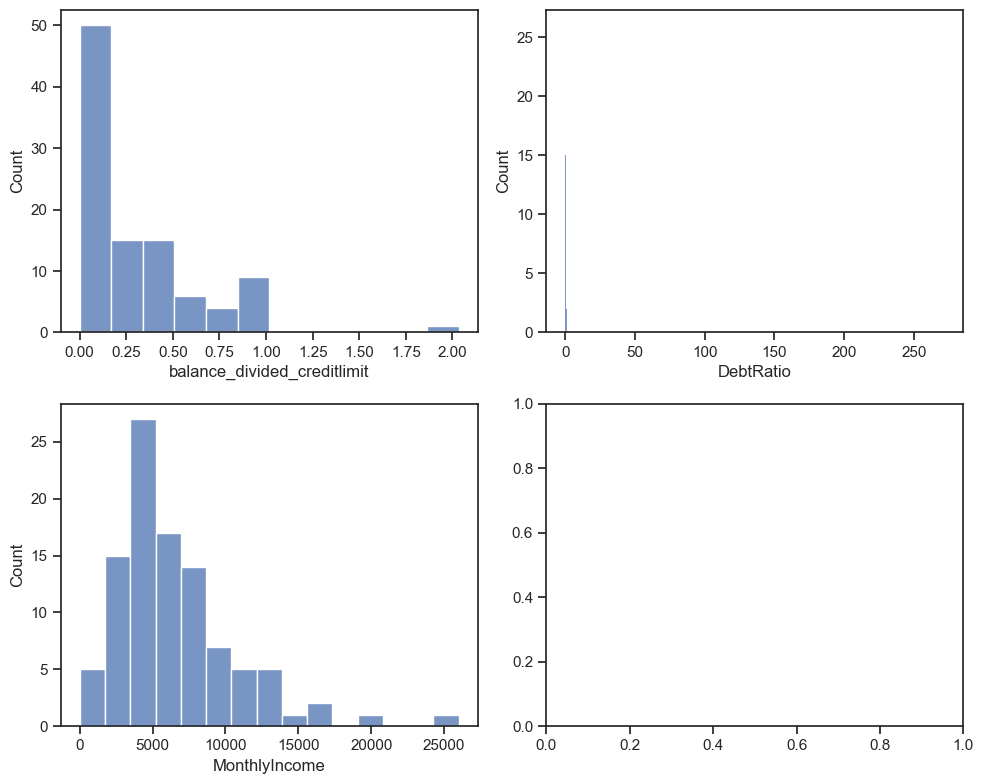

In [30]:
particioned_data_0= X_train.iloc[:100, 0]
particioned_data_2= X_train.iloc[:100, 2]
particioned_data_3= X_train.iloc[:100, 3]
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # 1 linha, 2 colunas, gráfico 1
sns.histplot(particioned_data_0, ax=axs[0,0])

sns.histplot(particioned_data_2, ax=axs[0,1])
sns.histplot(particioned_data_3, ax=axs[1,0])
# sns.lineplot(x)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [34]:
X_train['DebtRatio'][:100].value_counts().sort_index()

DebtRatio
0.000000      2
0.000222      1
0.001137      1
0.003713      1
0.016214      1
             ..
0.827414      1
0.852978      1
0.895026      1
2.884154      1
272.000000    1
Name: count, Length: 99, dtype: int64

In [ ]:
X_train_normalized= normalize()

In [35]:
def cont(value):
    if value <=50000 and value>=3000:
        return value
ab= X_train['MonthlyIncome'].apply(cont).value_counts()
ab= pd.DataFrame(ab)
ab['Monthly_income']= ab.index
ab

,count,Monthly_income
MonthlyIncome,,
5000.0,2218,5000.0
4000.0,1674,4000.0
6000.0,1550,6000.0
3000.0,1391,3000.0
10000.0,1172,10000.0
...,...,...
10144.0,1,10144.0
21883.0,1,21883.0
9341.0,1,9341.0


<Axes: xlabel='Monthly_income', ylabel='Count'>

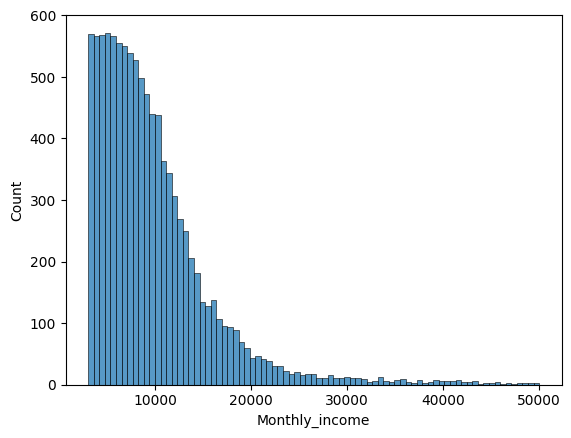

In [36]:
import seaborn as sns
sns.histplot(ab['Monthly_income'])

In [61]:
print(X_train.shape, "----", X_test.shape)

(96289, 9) ---- (23980, 9)
